In [21]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
#Loading the Sleep health and Lifestyle dataset
df = pd.read_csv("C:/Data/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### DATA PRE-PROCESSING

In [3]:
#Checking for null values in the dataset
null_counts = df.isnull().sum()
print(null_counts) 

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [4]:
#Finding unique values in the categorical columns
categorical_cols = df.select_dtypes(exclude=["number"]).columns
unique_values_df = pd.DataFrame(columns=["Column", "Unique Values"])

In [5]:
for col in categorical_cols:
    uniques = df[col].unique().tolist()
    unique_values_df = unique_values_df.append({"Column": col, "Unique Values": uniques}, ignore_index=True)


C:\Users\Namita\AppData\Local\Temp\ipykernel_3440\2999599288.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_df = unique_values_df.append({"Column": col, "Unique Values": uniques}, ignore_index=True)
C:\Users\Namita\AppData\Local\Temp\ipykernel_3440\2999599288.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_df = unique_values_df.append({"Column": col, "Unique Values": uniques}, ignore_index=True)
C:\Users\Namita\AppData\Local\Temp\ipykernel_3440\2999599288.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_df = unique_values_df.append({"Column": col, "Unique Values": uniques}, ignore_index=True)
C:\Users\Namita\AppData\Local\Temp\ipykernel_3440\2999599288.py:3: FutureWarnin

In [6]:
print(unique_values_df)

           Column                                      Unique Values
0          Gender                                     [Male, Female]
1      Occupation  [Software Engineer, Doctor, Sales Representati...
2    BMI Category         [Overweight, Normal, Obese, Normal Weight]
3  Blood Pressure  [126/83, 125/80, 140/90, 120/80, 132/87, 130/8...
4  Sleep Disorder                      [None, Sleep Apnea, Insomnia]


In [23]:
#Replacing the value Normal Weight to Normal
df["BMI Category"] = df["BMI Category"].str.replace("Normal Weight", "Normal")

In [8]:
print(unique_values_df)

           Column                                      Unique Values
0          Gender                                     [Male, Female]
1      Occupation  [Software Engineer, Doctor, Sales Representati...
2    BMI Category         [Overweight, Normal, Obese, Normal Weight]
3  Blood Pressure  [126/83, 125/80, 140/90, 120/80, 132/87, 130/8...
4  Sleep Disorder                      [None, Sleep Apnea, Insomnia]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [10]:
#Descriptive Statistics
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [24]:
#Splitting the column'Blood Pressure'
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [25]:
df1 = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,0,1
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [26]:
#Renaming the 2 new columns of Blood Pressure
df1 = df1.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


### DATA VISUALIZATION

In [14]:
disorder_counts = df1['Sleep Disorder'].value_counts()
disorder_counts

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

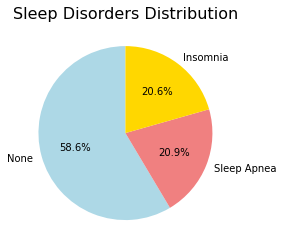

In [15]:
# Creating pie chart to show distribution of sleep disorders
plt.pie(disorder_counts, 
        labels=disorder_counts.index, 
        autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral', 'gold'], 
        startangle=90)

plt.title('Sleep Disorders Distribution', fontsize=16)

plt.show()

In [16]:
df1.Age.describe()

count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

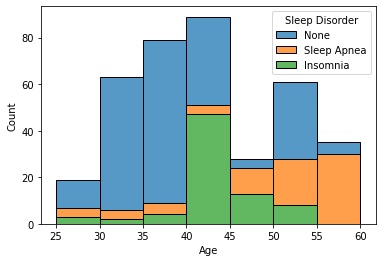

In [17]:
#Plotting count distribution of age with repect to sleep disorders
sns.histplot(data=df1, x="Age", hue="Sleep Disorder", multiple="stack",  bins=np.arange(25, 65, 5) )

Insomnia occurs the most between the ages 40-45 and Apnea occurs the most in the age range 50-60

In [18]:
df1.Occupation.value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Sleep Duration', ylabel='Occupation'>

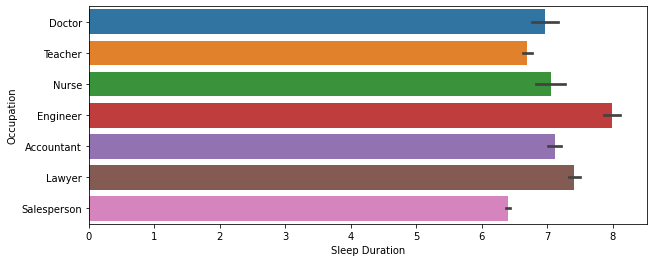

In [19]:
#Finding sleep duration of different occupations
plt.figure(figsize = (10,4))

#Since we do not have enough samples for some occupations, we will find this relationship for a subset of occupation

occupation = df.loc[df1.Occupation.isin(["Nurse", "Doctor", "Engineer", "Lawyer", "Teacher", "Accountant", "Salesperson"])]
occupation
sns.barplot(data= occupation, y= "Occupation", x="Sleep Duration", orient ="h")

Interestingly, Engineers and Lawyers sleep the most on a average and Teachers and Salespeople sleep the least.

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Occupation'>

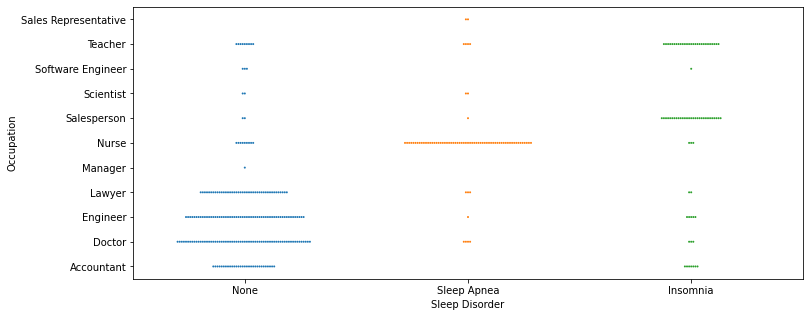

In [20]:
#Finding disorders affecting each Occupation 
plt.figure(figsize = (12,5))
sns.swarmplot(data= df1, y= "Occupation", x= "Sleep Disorder", size = 2)

Occupations which have the most occurence of:

Insomnia: Teachers, Salesperson

Apnea: Nurse

No Disorder: Lawyer, Doctor, Engineer, Accountant

In [21]:
#Which Sleep Disorder occurs the most amongst different Genders?
df1.groupby("Gender")["Sleep Disorder"].value_counts()

Gender  Sleep Disorder
Female  None               82
        Sleep Apnea        67
        Insomnia           36
Male    None              137
        Insomnia           41
        Sleep Apnea        11
Name: Sleep Disorder, dtype: int64

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Count'>

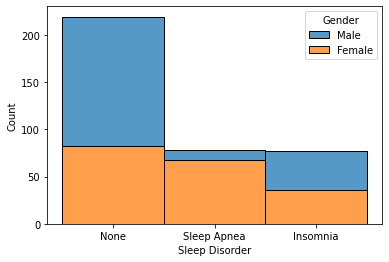

In [22]:
sns.histplot(data= df1, x= 'Sleep Disorder', hue="Gender", multiple = "stack")

Females are more likely to have Apnea than men. The proportion of men with no sleep disorder is also more than women.

In [23]:
# Finding how BMI category affects sleep disorders
bmiCat_counts = df1['BMI Category'].value_counts()
bmiCat_counts

Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64

<AxesSubplot:xlabel='BMI Category', ylabel='Count'>

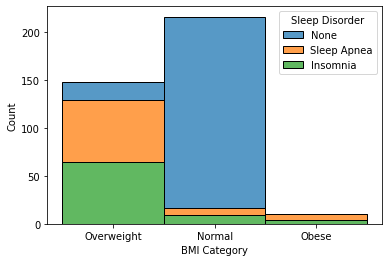

In [24]:
sns.histplot(data= df1, x= 'BMI Category', hue="Sleep Disorder", multiple = "stack")

#### Handling Categorical Variables

In [27]:
#import label encoder
from sklearn import preprocessing 
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1['Occupation'] = label_encoder.fit_transform(df1['Occupation'])
df1['BMI Category'] = label_encoder.fit_transform(df1['BMI Category'])
df1['Sleep Disorder'] = label_encoder.fit_transform(df1['Sleep Disorder'])
df1.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,1,27,9,6.1,6,42,6,2,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,4,1,28,6,5.9,4,30,8,1,85,3000,2,140,90
4,5,1,28,6,5.9,4,30,8,1,85,3000,2,140,90


In [28]:
df1['BloodPressure_Upper_Value'] = df1['BloodPressure_Upper_Value'].astype(float)
df1['BloodPressure_Lower_Value'] = df1['BloodPressure_Lower_Value'].astype(float)

#### Outlier Removal

In [29]:
num_col = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Heart Rate', 'Daily Steps', 'BloodPressure_Upper_Value', 'BloodPressure_Lower_Value']

Q1 = df1[num_col].quantile(0.25)
Q3 = df1[num_col].quantile(0.75)
IQR = Q3 - Q1

df1 = df1[~((df1[num_col] < (Q1 - 1.5 * IQR)) | (df1[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

### MACHINE LEARNING: MULTI-CLASSIFICATION PREDICTION

In [30]:
# Prepare the data
X = df1.iloc[:,[1,2,3,4,5,6,7,8,9,10,12,13]]
X.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,27,9,6.1,6,42,6,2,77,4200,126.0,83.0
1,1,28,1,6.2,6,60,8,0,75,10000,125.0,80.0
2,1,28,1,6.2,6,60,8,0,75,10000,125.0,80.0
7,1,29,1,7.8,7,75,6,0,70,8000,120.0,80.0
8,1,29,1,7.8,7,75,6,0,70,8000,120.0,80.0


In [31]:
y=df1.iloc[:,11]
y.head()

0    1
1    1
2    1
7    1
8    1
Name: Sleep Disorder, dtype: int32

#### Split the data into train and test sets

In [32]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
#Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### K- Nearest Neighbours

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

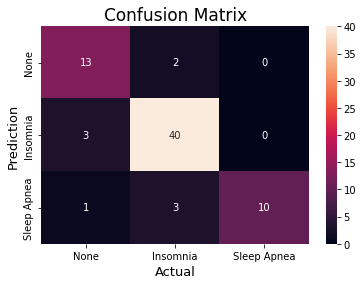

In [37]:
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['None','Insomnia', 'Sleep Apnea'],
            yticklabels=['None','Insomnia', 'Sleep Apnea'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [38]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.89      0.93      0.91        43
           2       1.00      0.71      0.83        14

    accuracy                           0.88        72
   macro avg       0.88      0.84      0.85        72
weighted avg       0.88      0.88      0.87        72

Accuracy: 0.875


### Support Vector Classifier

In [37]:
# import support vector classifier
# "Support Vector Classifier"
from sklearn.svm import SVC
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
y_pred = clf.predict(X_test)

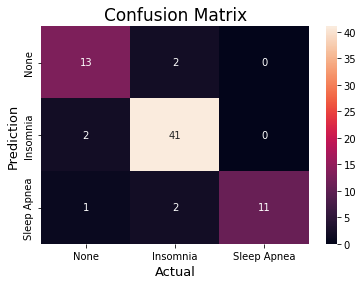

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['None','Insomnia', 'Sleep Apnea'],
            yticklabels=['None','Insomnia', 'Sleep Apnea'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [40]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.91      0.95      0.93        43
           2       1.00      0.79      0.88        14

    accuracy                           0.90        72
   macro avg       0.91      0.87      0.88        72
weighted avg       0.91      0.90      0.90        72

Accuracy: 0.9027777777777778


### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred = classifier.predict(X_test)

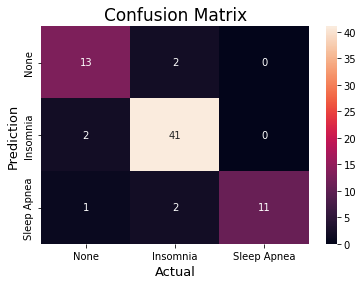

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['None','Insomnia', 'Sleep Apnea'],
            yticklabels=['None','Insomnia', 'Sleep Apnea'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [44]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.91      0.95      0.93        43
           2       1.00      0.79      0.88        14

    accuracy                           0.90        72
   macro avg       0.91      0.87      0.88        72
weighted avg       0.91      0.90      0.90        72

Accuracy: 0.9027777777777778


### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=75)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=75)

In [46]:
y_pred = classifier.predict(X_test)

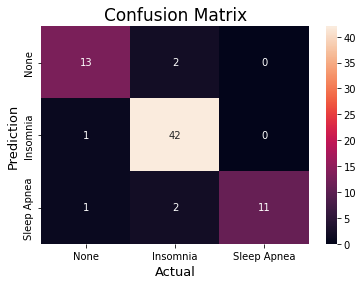

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['None','Insomnia', 'Sleep Apnea'],
            yticklabels=['None','Insomnia', 'Sleep Apnea'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [48]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.91      0.98      0.94        43
           2       1.00      0.79      0.88        14

    accuracy                           0.92        72
   macro avg       0.93      0.88      0.90        72
weighted avg       0.92      0.92      0.92        72

Accuracy: 0.9166666666666666


### Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [50]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[14  1  0]
 [ 1 42  0]
 [ 2  1 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.95      0.98      0.97        43
           2       1.00      0.79      0.88        14

    accuracy                           0.93        72
   macro avg       0.93      0.90      0.91        72
weighted avg       0.94      0.93      0.93        72

Accuracy: 0.9305555555555556


### Logistic Regression

In [41]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred = logr.predict(X_test)

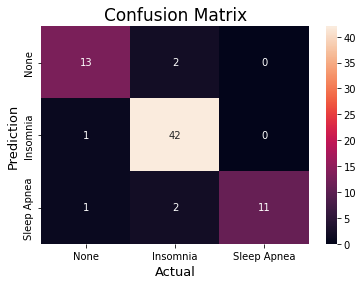

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['None','Insomnia', 'Sleep Apnea'],
            yticklabels=['None','Insomnia', 'Sleep Apnea'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[13  2  0]
 [ 1 42  0]
 [ 1  2 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.91      0.98      0.94        43
           2       1.00      0.79      0.88        14

    accuracy                           0.92        72
   macro avg       0.93      0.88      0.90        72
weighted avg       0.92      0.92      0.92        72

Accuracy: 0.9166666666666666
